# Évolution du parc végétal de Grenoble

## Imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from ipywidgets import interact, interactive, fixed, interact_manual


## Download the [Dataset](https://entrepot.metropolegrenoble.fr/opendata/38185-GRE/EspacePublic/csv/ESP_PUBLIC.IDENTITE_ARBRE.csv)
(https://entrepot.metropolegrenoble.fr/opendata/38185-GRE/EspacePublic/csv/ESP_PUBLIC.IDENTITE_ARBRE.csv)


In [14]:
url = 'https://entrepot.metropolegrenoble.fr/opendata/38185-GRE/EspacePublic/csv/ESP_PUBLIC.IDENTITE_ARBRE.csv'
df = pd.read_csv(url, low_memory=False)

In [15]:
#df.ANNEEDEPLANTATION.unique()
#df.SOUS_CATEGORIE_DESC.unique()

In [16]:
#display(df)

## Proportion des principales espèces botaniques présentes au sein des arbres plantés à Grenoble
- On ne conserve que **les espèces botaniques plantées au moins 150 fois** (pour que le diagramme soit un minimum lisible)

array([<AxesSubplot:ylabel='None'>], dtype=object)

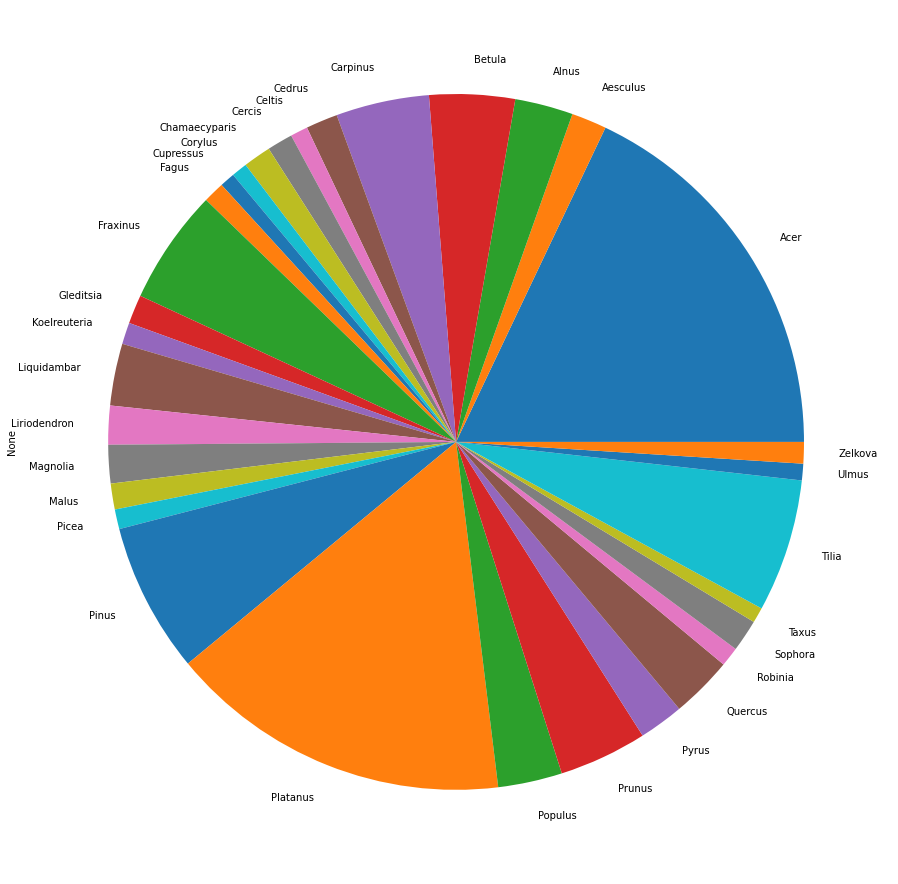

In [17]:
genreBotanique = pd.DataFrame(df["GENRE_BOTA"])
test = genreBotanique.groupby('GENRE_BOTA').value_counts()
test[test >= 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)

## Digramme Interractif : Proportion des espèces botaniques plantées au sein des différents arbres à Grenoble par année
- Filtre pour observer seulement les arbres de voirie ou non 
- On ne conserve pas que *les espèces botaniques plantées au moins 150 fois* (Le diagramme peut difficielement lisible)

In [18]:
from IPython.display import display
def updateChart(yearPlantation, arbreVoirieFlag):
    
    # Deep Copy original DataSet
    copy = df.copy(deep=True)
    
    # filter if arbreVoirieFlag is True
    if arbreVoirieFlag:
        copy = copy.loc[copy["SOUS_CATEGORIE_DESC"] == "Arbre de voirie"]
    
    # filter trees to keep only those that were planted before yearPlantation
    copy = copy.loc[copy["ANNEEDEPLANTATION"] <= yearPlantation]
    
    # Count tree by botanical genus
    botanicalGenus = pd.DataFrame(copy["GENRE_BOTA"])
    botanicalGenus = botanicalGenus.groupby('GENRE_BOTA').value_counts()
    
    #botanicalGenus[botanicalGenus >= 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)
    botanicalGenus.plot.pie(figsize=(16,16), subplots=True, legend=False)

interact(updateChart, yearPlantation=(1900,2021), arbreVoirieFlag=widgets.Checkbox(value=False,description='Arbre de voirie',disabled=False))



interactive(children=(IntSlider(value=1960, description='yearPlantation', max=2021, min=1900), Checkbox(value=…

<function __main__.updateChart(yearPlantation, arbreVoirieFlag)>

## Digramme Interractif : Proportion des principales espèces botaniques plantées au sein des différents arbres à Grenoble par année
- Filtre pour observer seulement les arbres de voirie ou non 
- On ne conserve que **les espèces botaniques plantées au moins 150 fois** (pour que le diagramme soit un minimum lisible)

In [21]:
from IPython.display import display
def updateChart(yearPlantation, arbreVoirieFlag):
    
    # Deep Copy original DataSet
    copy = df.copy(deep=True)
    
    # filter if arbreVoirieFlag is True
    if arbreVoirieFlag:
        copy = copy.loc[copy["SOUS_CATEGORIE_DESC"] == "Arbre de voirie"]
    
    # filter trees to keep only those that were planted before yearPlantation
    copy = copy.loc[copy["ANNEEDEPLANTATION"] <= yearPlantation]
    
    # Count tree by botanical genus
    botanicalGenus = pd.DataFrame(copy["GENRE_BOTA"])
    botanicalGenus = botanicalGenus.groupby('GENRE_BOTA').value_counts()
    
    #botanicalGenus[botanicalGenus >= 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)
    botanicalGenus[botanicalGenus < 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)

interact(updateChart, yearPlantation=(1900,2021), arbreVoirieFlag=widgets.Checkbox(value=False,description='Arbre de voirie',disabled=False))



interactive(children=(IntSlider(value=1960, description='yearPlantation', max=2021, min=1900), Checkbox(value=…

<function __main__.updateChart(yearPlantation, arbreVoirieFlag)>

## Digramme Interractif : Proportion des espèces botaniques secondaire plantées au sein des différents arbres à Grenoble par année
- Filtre pour observer seulement les arbres de voirie ou non 
- On ne conserve que **les espèces botaniques plantées moins 150 fois** (pour que le diagramme soit un minimum lisible)

In [21]:
from IPython.display import display
def updateChart(yearPlantation, arbreVoirieFlag):
    
    # Deep Copy original DataSet
    copy = df.copy(deep=True)
    
    # filter if arbreVoirieFlag is True
    if arbreVoirieFlag:
        copy = copy.loc[copy["SOUS_CATEGORIE_DESC"] == "Arbre de voirie"]
    
    # filter trees to keep only those that were planted before yearPlantation
    copy = copy.loc[copy["ANNEEDEPLANTATION"] <= yearPlantation]
    
    # Count tree by botanical genus
    botanicalGenus = pd.DataFrame(copy["GENRE_BOTA"])
    botanicalGenus = botanicalGenus.groupby('GENRE_BOTA').value_counts()
    
    #botanicalGenus[botanicalGenus >= 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)
    botanicalGenus[botanicalGenus < 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)

interact(updateChart, yearPlantation=(1900,2021), arbreVoirieFlag=widgets.Checkbox(value=False,description='Arbre de voirie',disabled=False))



interactive(children=(IntSlider(value=1960, description='yearPlantation', max=2021, min=1900), Checkbox(value=…

<function __main__.updateChart(yearPlantation, arbreVoirieFlag)>